# Avocado Prices
Historical data on avocado prices and sales volume in multiple US markets

# 1) Importing libraries

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# For processing
import numpy as np
import pandas as pd

In [4]:
# for modelling
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [5]:
# For deep learning 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from numpy import argmax

Using TensorFlow backend.


# 2) Loading dataset

In [6]:
df = pd.read_csv("avocado.csv")

In [7]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [9]:
df.shape

(18249, 14)

# 3) Knowing data

In [10]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
df['AveragePrice'].head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [14]:
df['type'].value_counts().sort_values(ascending=False)

conventional    9126
organic         9123
Name: type, dtype: int64

In [15]:
df.groupby("region").size()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

In [16]:
df['region'].value_counts().sort_values(ascending=False)

BaltimoreWashington    338
Jacksonville           338
HartfordSpringfield    338
Northeast              338
DallasFtWorth          338
Philadelphia           338
Boston                 338
Louisville             338
Pittsburgh             338
Atlanta                338
Midsouth               338
California             338
GrandRapids            338
Chicago                338
Spokane                338
Charlotte              338
Tampa                  338
Columbus               338
HarrisburgScranton     338
StLouis                338
West                   338
Southeast              338
SanDiego               338
Boise                  338
Seattle                338
SanFrancisco           338
GreatLakes             338
Denver                 338
Nashville              338
Sacramento             338
NewYork                338
MiamiFtLauderdale      338
NorthernNewEngland     338
Syracuse               338
CincinnatiDayton       338
Orlando                338
RaleighGreensboro      338
S

In [17]:
df['region'].values

array(['Albany', 'Albany', 'Albany', ..., 'WestTexNewMexico',
       'WestTexNewMexico', 'WestTexNewMexico'], dtype=object)

In [18]:
df['region'].values.tolist()

['Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlant

In [19]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

When we call .plot() on a dataframe, it is just assumed that the x axis will be your index, and then Y will be all of your columns,

## 4) Data and Time issue

In [20]:
# Finding price of fruit in Albany region
albany_df = df[df['region']=="Albany"]

In [21]:
albany_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
albany_df.shape

(338, 13)

In [23]:
albany_df.set_index("Date", inplace=True)

In [24]:
albany_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Date has moved to index. This would provide us in ploting and also understanding data

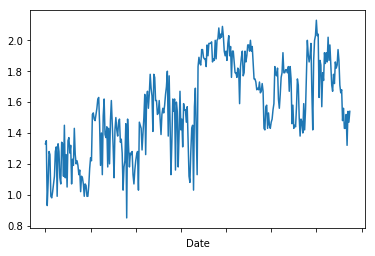

In [25]:
albany_df["AveragePrice"].plot()

Dates are running over each other. So, system does not know if its date and time in our data.

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
# Revise same above procedure
albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)

In [28]:
albany_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


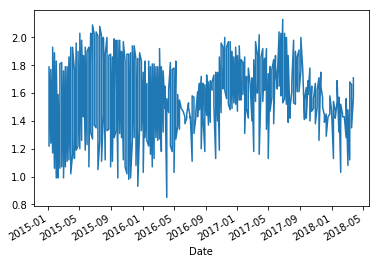

In [29]:
albany_df["AveragePrice"].plot()

We need to smooth this graph. Hence, we do moving average

### i) Moving average

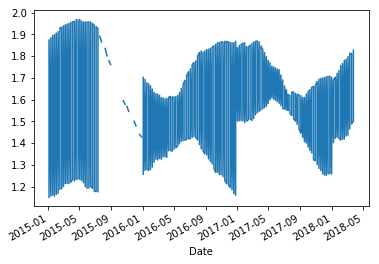

In [30]:
albany_df["AveragePrice"].rolling(25).mean().plot()

dataframe itself needs to be sorted

In [31]:
albany_df.sort_index(inplace=True)

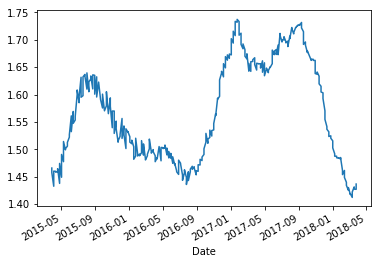

In [32]:
albany_df["AveragePrice"].rolling(25).mean().plot()

Plot provides summary of avocado prices for Albany over the years

In [33]:
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [34]:
albany_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,NaN
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,NaN
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,NaN
2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany,NaN
2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,NaN


1st 25 will be NaN values as moving average size was 25

In [35]:
albany_df.head(27)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,NaN
2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,NaN
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,conventional,2015,Albany,NaN
2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.00,organic,2015,Albany,NaN
2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,conventional,2015,Albany,NaN
2015-01-18,1.93,1118.47,8.02,178.78,0.00,931.67,931.67,0.00,0.00,organic,2015,Albany,NaN
2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.00,conventional,2015,Albany,NaN
2015-01-25,1.89,1115.89,14.87,148.72,0.00,952.30,952.30,0.00,0.00,organic,2015,Albany,NaN
2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.00,conventional,2015,Albany,NaN


In [36]:
albany_df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,
2018-03-11,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany,1.4224
2018-03-18,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany,1.4316
2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany,1.4276
2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany,1.4272
2018-03-25,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany,1.4368


In [37]:
# To avoid different warnings

albany_df = df.copy()[df['region']=="Albany"] # we make a copy of df using Albany
albany_df.set_index('Date', inplace=True)
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

### ii) Graphing all regions 

In [38]:
df['region']

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
5                  Albany
6                  Albany
7                  Albany
8                  Albany
9                  Albany
10                 Albany
11                 Albany
12                 Albany
13                 Albany
14                 Albany
15                 Albany
16                 Albany
17                 Albany
18                 Albany
19                 Albany
20                 Albany
21                 Albany
22                 Albany
23                 Albany
24                 Albany
25                 Albany
26                 Albany
27                 Albany
28                 Albany
29                 Albany
               ...       
18219             TotalUS
18220             TotalUS
18221             TotalUS
18222             TotalUS
18223             TotalUS
18224             TotalUS
18225                West
18226       

In [39]:
# Converting into an array
df['region'].values

array(['Albany', 'Albany', 'Albany', ..., 'WestTexNewMexico',
       'WestTexNewMexico', 'WestTexNewMexico'], dtype=object)

In [40]:
# convert to strings i.e list
df['region'].values.tolist()

['Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Albany',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlanta',
 'Atlant

In [41]:
# Taking all values as set
print(set(df['region'].values.tolist()))

{'NewOrleansMobile', 'SouthCarolina', 'Boston', 'Louisville', 'NorthernNewEngland', 'StLouis', 'SanDiego', 'Philadelphia', 'Indianapolis', 'NewYork', 'Boise', 'WestTexNewMexico', 'GrandRapids', 'Pittsburgh', 'Albany', 'MiamiFtLauderdale', 'TotalUS', 'Houston', 'Charlotte', 'West', 'Seattle', 'Northeast', 'BaltimoreWashington', 'Spokane', 'Nashville', 'Denver', 'Orlando', 'Atlanta', 'GreatLakes', 'Midsouth', 'HartfordSpringfield', 'RichmondNorfolk', 'Sacramento', 'California', 'Jacksonville', 'LosAngeles', 'Plains', 'Tampa', 'SanFrancisco', 'Columbus', 'HarrisburgScranton', 'RaleighGreensboro', 'BuffaloRochester', 'Syracuse', 'SouthCentral', 'Detroit', 'CincinnatiDayton', 'Chicago', 'Roanoke', 'Southeast', 'Portland', 'LasVegas', 'PhoenixTucson', 'DallasFtWorth'}


**take pandas data and get it out into array/list in one step i.e using unique**

In [42]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

**Now we can iterate these values**

In [43]:
# We need to graph each value now
graph_df = pd.DataFrame()

In [44]:
# Doing same as above. Only this time, we are going for all region points instead of Albany
for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets.It is to make it dataframe instead of series
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


**It works very slow. We need to check on "type" variable.dates are still getting duplicated.Dates are still getting duplicated.  **

In [45]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,Columbus_price25ma,DallasFtWorth_price25ma,Denver_price25ma,Detroit_price25ma,GrandRapids_price25ma,GreatLakes_price25ma
Date,,,,,,,,,,,,,,,,
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1492,1.3264,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3164,1.2788
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2568
2018-03-25,1.4368,1.2884,1.3844,1.5016,1.588,1.2232,1.4232,1.4916,1.5708,1.2792,1.1704,1.118,1.2888,1.1728,1.3264,1.2788


**2018-03-25 is the date all over again.Each row should be a separate date, but it's not**

### iii- Solving duplicate dates

In [46]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

conventional    9126
organic         9123

**Our avocados have multiple prices: Organic and Conventional! So, let's pick one. I'll go with organic.**

In [47]:
# Working with organic type and re-do what we have done so far
df = pd.read_csv("avocado.csv")
df = df.copy()[df['type']=='organic']

df["Date"] = pd.to_datetime(df["Date"])

df.sort_values(by="Date", ascending=True, inplace=True) # it will sort by columns, sort_index by rows
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9489,51,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.0,organic,2015,California
10269,51,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.0,organic,2015,LasVegas
10893,51,2015-01-04,1.12,17296.85,14569.66,1868.59,0.00,858.60,830.00,28.60,0.0,organic,2015,PhoenixTucson
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.0,organic,2015,BuffaloRochester
11621,51,2015-01-04,1.30,5782.70,723.29,4221.15,0.00,838.26,223.33,614.93,0.0,organic,2015,Spokane


In [48]:
graph_df = pd.DataFrame()

for region in df['region'].unique():
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

In [49]:
graph_df.tail()

,California_price25ma,LasVegas_price25ma,PhoenixTucson_price25ma,BuffaloRochester_price25ma,Spokane_price25ma,LosAngeles_price25ma,Philadelphia_price25ma,Boston_price25ma,StLouis_price25ma,Louisville_price25ma,...,Houston_price25ma,Chicago_price25ma,Plains_price25ma,Indianapolis_price25ma,SouthCentral_price25ma,Columbus_price25ma,Albany_price25ma,Detroit_price25ma,NewOrleansMobile_price25ma,NewYork_price25ma
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-25,1.9128,1.9120,1.7468,1.2912,2.1544,1.9024,1.6324,1.7636,1.9240,1.7044,...,1.6132,1.8160,1.8116,1.4928,1.5728,1.6064,1.5112,1.4980,1.5384,1.9308
2018-03-04,1.8876,1.8748,1.7404,1.2744,2.1040,1.8656,1.6260,1.7708,1.8868,1.6816,...,1.5960,1.8024,1.7900,1.4744,1.5592,1.5804,1.4992,1.4692,1.5288,1.9156
2018-03-11,1.8636,1.8440,1.7324,1.2652,2.0552,1.8284,1.6300,1.7824,1.8468,1.6508,...,1.5696,1.7836,1.7672,1.4540,1.5400,1.5496,1.5044,1.4444,1.5076,1.9092
2018-03-18,1.8516,1.8204,1.7216,1.2560,2.0012,1.8160,1.6304,1.7932,1.8192,1.6176,...,1.5360,1.7732,1.7452,1.4320,1.5204,1.5088,1.5140,1.4092,1.4860,1.8948
2018-03-25,1.8364,1.7968,1.7104,1.2416,1.9496,1.8016,1.6256,1.7984,1.7976,1.5844,...,1.5128,1.7672,1.7232,1.4160,1.5072,1.4848,1.5188,1.3964,1.4616,1.8876


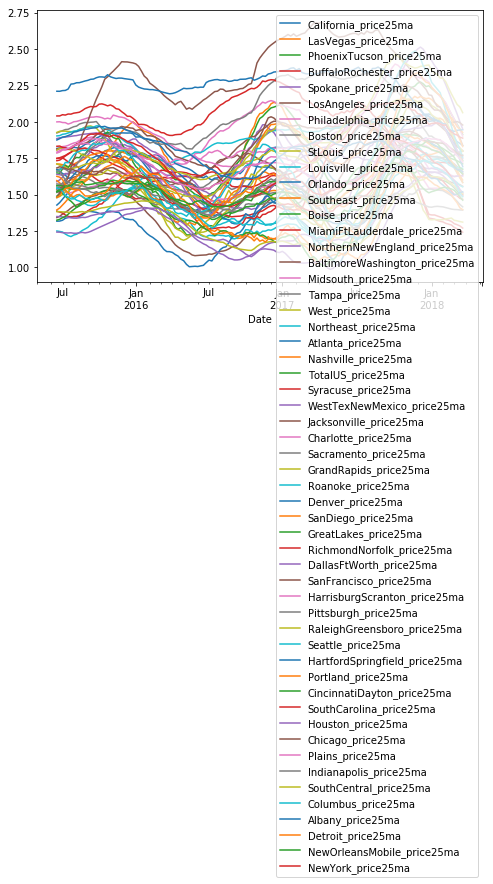

In [50]:
graph_df.plot(figsize=(8,5))

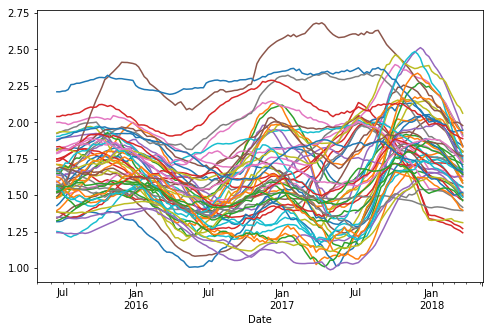

In [51]:
graph_df.plot(figsize=(8,5), legend=False) # Legend would be region as shown in colors